In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Titanic dataset
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [3]:
# Data Exploration
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# check missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [7]:
# Dropping irrelevant columns
train_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True)
test_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True)

In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [9]:
# Encode 'Embarked' using LabelEncoder
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

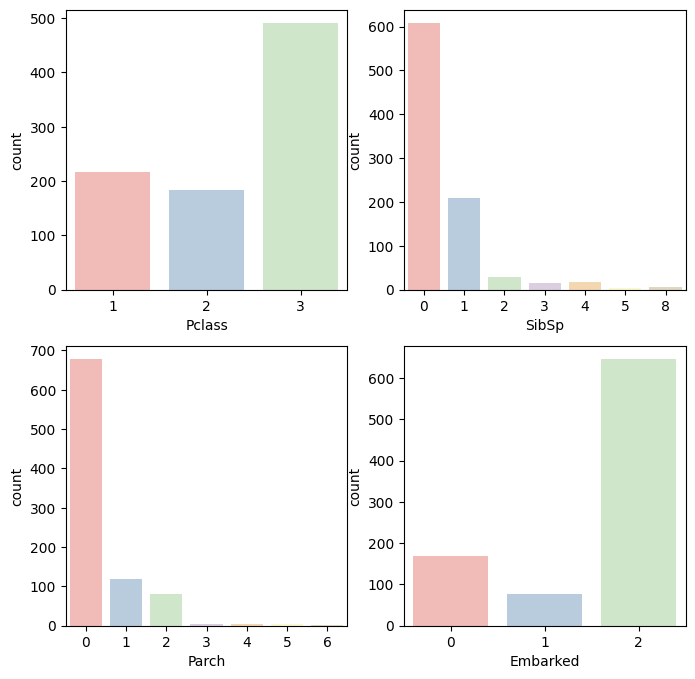

In [10]:
# Visualizing count plots of categorical variables
fig, axis = plt.subplots(2, 2, figsize=(8, 8))
sns.countplot(ax=axis[0, 0], x='Pclass', data=train_data, palette='Pastel1')
sns.countplot(ax=axis[0, 1], x='SibSp', data=train_data, palette='Pastel1')
sns.countplot(ax=axis[1, 0], x='Parch', data=train_data, palette='Pastel1')
sns.countplot(ax=axis[1, 1], x='Embarked', data=train_data, palette='Pastel1')
plt.show()

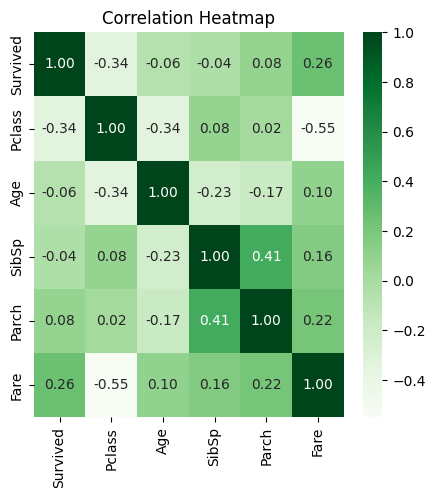

In [11]:
# Correlation heatmap
correlation = train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation, annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Define features and target variable
features = train_data.drop(columns=['Survived'])
target = train_data['Survived']

In [13]:
# Train-test split
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(712, 7)
(179, 7)
(712,)
(179,)


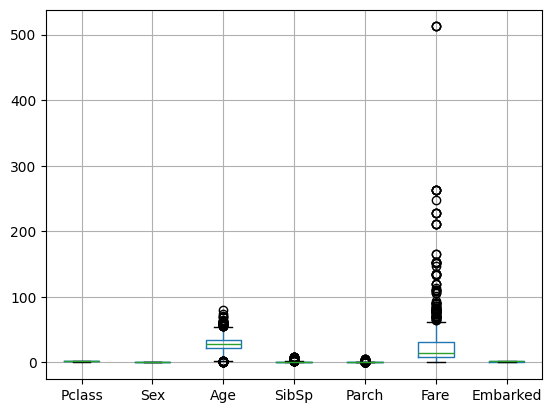

In [14]:
# Check for outliers using a boxplot
x_train.boxplot()
plt.show()

In [15]:
# Build and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Predictions and evaluation
y_pred = log_reg.predict(x_val)
print(f'Accuracy: {accuracy_score(y_val, y_pred) * 100:.2f}%')
print('Confusion Matrix:\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Accuracy: 81.01%
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



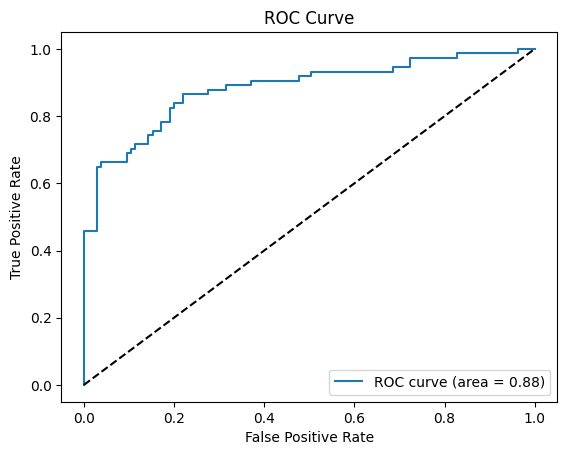

In [17]:
# ROC-AUC Score
y_prob = log_reg.predict_proba(x_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_prob)
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
# Model Coefficients
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': log_reg.coef_[0]
})
print(coefficients)

    Feature  Coefficient
0    Pclass    -0.930680
1       Sex    -2.596994
2       Age    -0.030433
3     SibSp    -0.293905
4     Parch    -0.111853
5      Fare     0.002534
6  Embarked    -0.218777


In [19]:
# Predict on test data
y_test_pred = log_reg.predict(test_data)
print("Test Predictions:", y_test_pred)

Test Predictions: [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [20]:
# Save the model using pickle
file = 'logistic_regression.pkl'
pickle.dump(log_reg, open(file, 'wb'))
print("Model saved as logistic_regression.pkl")

Model saved as logistic_regression.pkl


### Questions

### 1. Difference Between Precision and Recall:  

- **Precision**: Indicates the proportion of correctly predicted positive cases out of all predicted positives.  
  - Formula: **Precision = True Positives / (True Positives + False Positives)**  
  - **Focus**: Ensuring that positive predictions are accurate.  

- **Recall**: Represents the proportion of actual positive cases that were correctly identified.  
  - Formula: **Recall = True Positives / (True Positives + False Negatives)**  
  - **Focus**: Capturing as many actual positives as possible.  

### 2. Cross-Validation and Its Importance in Binary Classification:  

- **Cross-validation** is a technique used to evaluate a model’s performance by dividing the dataset into multiple subsets. The model is trained on some subsets and tested on others, ensuring a more generalized evaluation.  
- **K-fold cross-validation** is a common approach where the dataset is split into *k* parts, and the model is trained and tested *k* times, each time using a different subset for validation.  

#### **Importance**:  
- Helps prevent **overfitting** by ensuring the model generalizes well to new data.  
- Provides a **more reliable performance estimate** by averaging results over multiple splits.  
- Maximizes data utilization by using different portions for both training and validation.